In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import ylabel
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_notebook

In [2]:
df = pd.read_csv("weight and height.csv")
df.head()

,Gender,Height,Weight
0,Male,178,85
1,Female,162,60
2,Male,185,92
3,Female,158,55
4,Male,172,78


In [3]:
x = df[["Height","Weight"]].values
y = df[["Gender"]].replace({'Male': 1, 'Female': 0}).values

C:\Users\AsiaLapTop.com\AppData\Local\Temp\ipykernel_20968\2736595454.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[["Gender"]].replace({'Male': 1, 'Female': 0}).values


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1076, 2), (270, 2), (1076, 1), (270, 1))

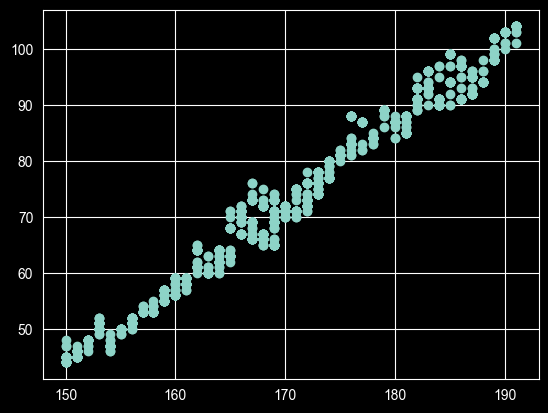

In [5]:
plt.scatter(df["Height"], df["Weight"])

In [1]:
class Perceptron:
    def __init__(self, learning_rate, n_features):
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand(1)
        self.learning_rate = learning_rate
        self.n_features = n_features
        self.epochs = None

    @staticmethod
    def activation_function(z, function):
        if "sigmoid" == function:
            return 1 / (1 + np.exp(-z))
        elif "relu" == function:
            return np.maximum(0, z)
        elif "tanh" == function:
            return np.tanh(z)
        elif "linear" == function:
            return z
        else:
            raise ValueError("Unknown activation function")

    def fit(self, x_train, y_train, epochs):
        self.epochs = epochs
        for epoch in tqdm(range(self.epochs)):
            for x, y in zip(x_train ,y_train):
                y_pred = self.forward(x)
                dw, db = self.backward(x, y, y_pred)
                self.update(dw, db)


    def forward(self, x):
        return self.activation_function(x @ self.weights + self.bias, 'sigmoid')

    @staticmethod
    def backward(x, y, y_pred):
        error = y_pred - y
        dw = error * x
        db = error
        return dw, db

    def update(self, dw, db):
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def predict(self, x_test):
        y_pred = []
        for x in x_test:
            y_pred.append(self.forward(x))
        return np.array(y_pred)

    def calculate_loss(self, x_test, y_test, metric):
        y_pred = self.predict(x_test)
        if metric == "mse":
            loss = np.mean((y_pred - y_test) ** 2)
        elif metric == "mae":
            loss = np.mean(np.abs(y_pred - y_pred))
        else:
            raise ValueError("Unknown metric")
        return loss

    def calculate_accuracy(self, x_test, y_test):
        y_pred = self.predict(x_test)
        y_pred = y_pred > 0.5
        accuracy = np.mean(y_pred == y_test)
        return accuracy

    def evaluate(self, x_test, y_test, metric):
        loss = self.calculate_loss(x_test, y_test, metric)
        accuracy = self.calculate_accuracy(x_test, y_test)
        return loss, accuracy


In [7]:
model = Perceptron(learning_rate=0.0001, n_features=x_train.shape[1])
model.fit(x_train, y_train, epochs=100)

100%|██████████| 100/100 [00:01<00:00, 83.64it/s]


In [8]:
model.evaluate(x_test, y_test, 'mae')

(np.float64(0.0), np.float64(0.9037037037037037))

In [9]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5

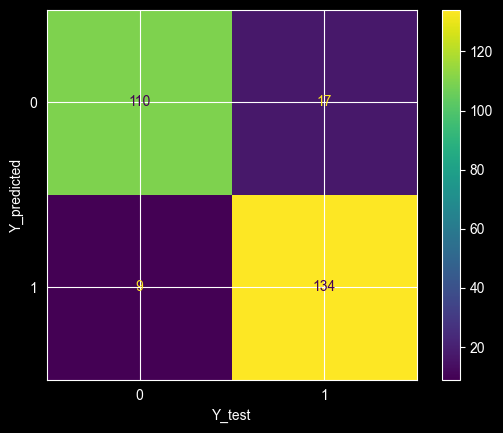

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,recall_score, precision_score

confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat).plot()
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.show()

In [11]:
print("Precision_score", precision_score(y_test, y_pred))
print("Recall_score", recall_score(y_test, y_pred))

Precision_score 0.8874172185430463
Recall_score 0.9370629370629371
